In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

In [3]:
df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [4]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
df.shape

(23066, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [9]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for i in df.columns:
    if df[i].dtype=="object" and i != "Timestamp":
        print(i)
        print(df[i].value_counts(normalize=True))
        print("\n")

InventoryType
Format4    0.310630
Format5    0.184211
Format1    0.165352
Format3    0.153473
Format6    0.080205
Format2    0.077560
Format7    0.028570
Name: InventoryType, dtype: float64


Ad Type
Inter224    0.071881
Inter217    0.071751
Inter223    0.071707
Inter219    0.071534
Inter221    0.071534
Inter222    0.071491
Inter229    0.071447
Inter227    0.071404
Inter218    0.071317
inter230    0.071274
Inter220    0.071274
Inter225    0.071230
Inter226    0.071100
Inter228    0.071057
Name: Ad Type, dtype: float64


Platform
Video    0.428033
Web      0.357713
App      0.214255
Name: Platform, dtype: float64


Device Type
Mobile     0.641897
Desktop    0.358103
Name: Device Type, dtype: float64


Format
Video      0.500824
Display    0.499176
Name: Format, dtype: float64




In [12]:
#Percentage missing values 
for i in df[["CTR", "CPC", "CPM"]]:
    print(i)
    print(round(df[i].isnull().sum()/df.shape[0]*100,2), "%")

CTR
20.53 %
CPC
20.53 %
CPM
20.53 %


### Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [13]:
def calculate_CTR(x):
    clicks = df.Clicks
    impressions = df.Impressions
    ctr = ((clicks/impressions)*100)   #Total Measured Clicks / Total Measured Ad Impressions x 100
    return ctr

In [14]:
df["CTR"]=df[["CTR"]].apply(lambda x: calculate_CTR(x))

In [15]:
df["CTR"].isnull().sum()

0

In [16]:
def calculate_CPC(y):
    spend = df.Spend
    clicks = df.Clicks
    cpc = (spend/clicks) # Total Cost (spend) / Number of Clicks
    return cpc

In [17]:
df["CPC"]=df[["CPC"]].apply(lambda y: calculate_CPC(y))

In [18]:
df["CPC"].isnull().sum()

0

In [19]:
def calculate_CPM(z):
    spend = df.Spend
    impressions = df.Impressions
    cpm = ((spend/impressions)*1000) #CPM = (Total Campaign Spend / Number of Impressions) * 1,000
    return cpm

In [20]:
df["CPM"]=df[["CPM"]].apply(lambda z: calculate_CPM(z))

In [21]:
df["CPM"].isnull().sum()

0

### Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

<AxesSubplot:>

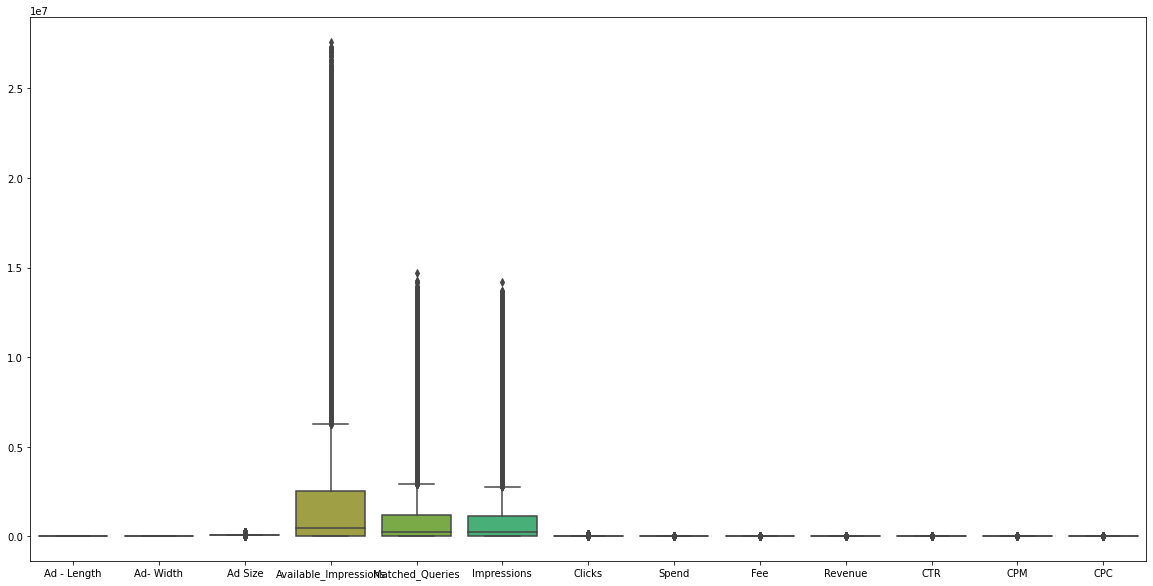

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

<AxesSubplot:>

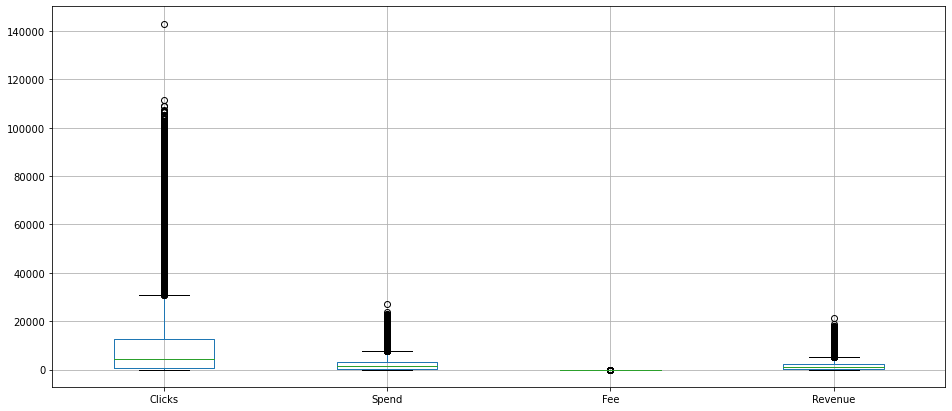

In [23]:
df[["Clicks", "Spend", "Fee", "Revenue"]].boxplot(figsize=(16,7))

<AxesSubplot:>

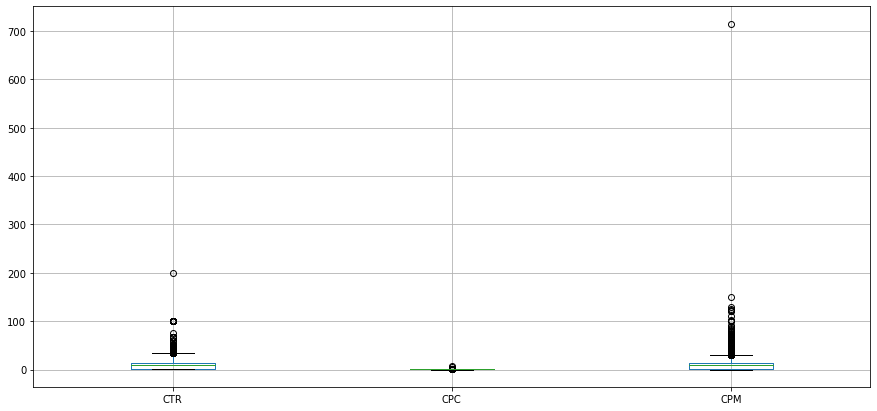

In [24]:
df[["CTR","CPC","CPM"]].boxplot(figsize=(15,7))


<AxesSubplot:>

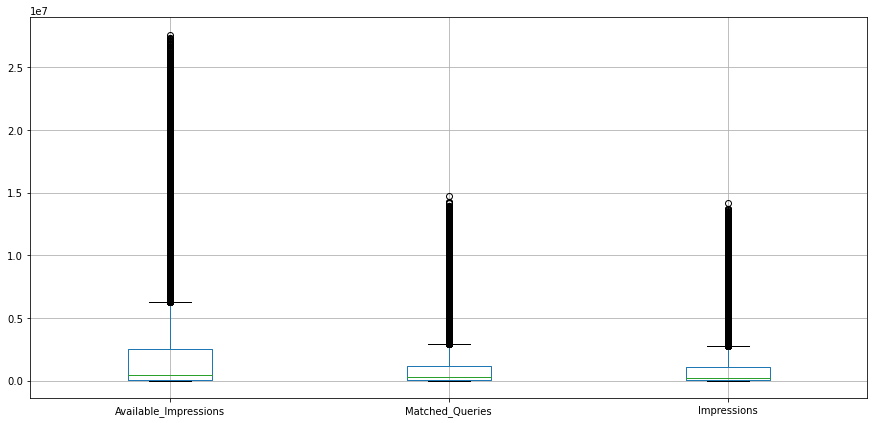

In [25]:
df[["Available_Impressions","Matched_Queries","Impressions"]].boxplot(figsize=(15,7))

<AxesSubplot:>

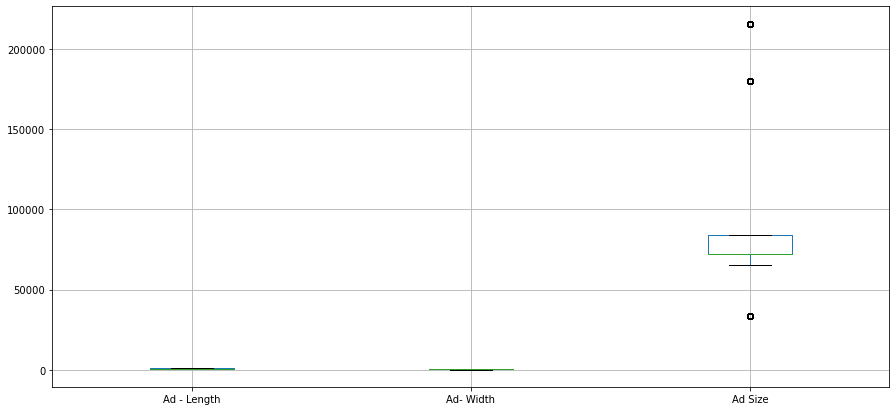

In [26]:
df[["Ad - Length", "Ad- Width", "Ad Size"]].boxplot(figsize=(15,7))

In [27]:
# Outlier Treatment 

In [28]:
df_num = df.select_dtypes(["int64", "float64"])

In [29]:
df_num.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


In [30]:
for i in df_num.columns:
    q1,q3 = df_num[i].quantile([0.25,0.75])
    IQR = q3-q1
    LL, UL = q1-1.5*IQR, q3+1.5*IQR
    df_num[i]=np.where(df_num[i]<LL, LL, df_num[i])
    df_num[i]= np.where(df_num[i]>UL, UL, df_num[i])

<AxesSubplot:>

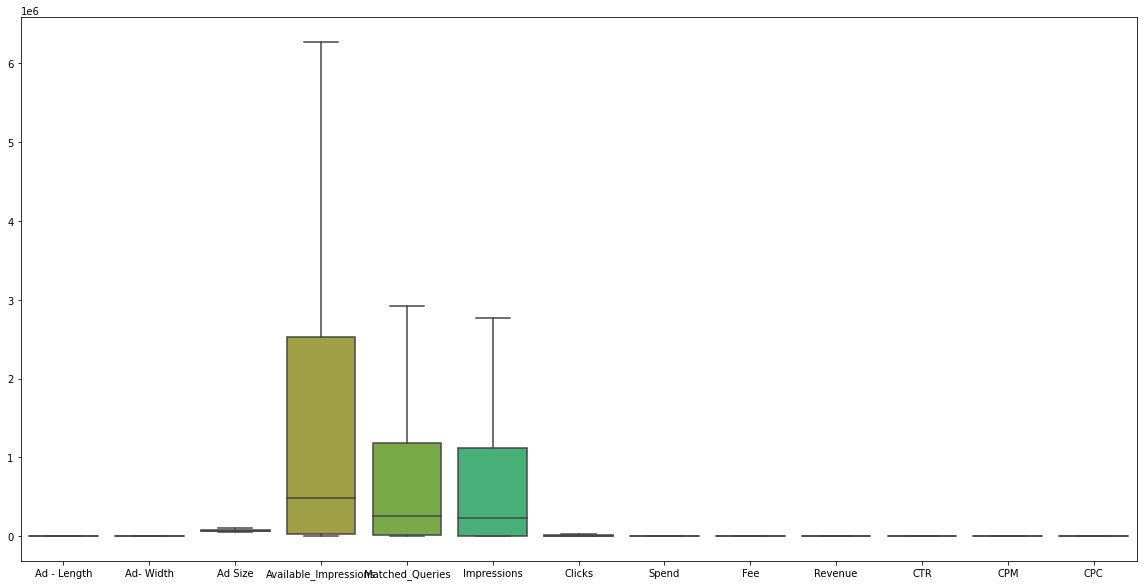

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_num)

### Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [32]:
from scipy.stats import zscore 

df_num_scaled = df_num.apply(zscore)

df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


In [33]:
df_num_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,-4.030447e-15,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,5.390161e-15,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-4.156304e-15,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,-3.617510e-15,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.341008e-15,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,-1.224345e-15,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,1.960656e-15,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,1.250852e-15,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,-2.322121e-14,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.136228e-15,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


### Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
wardlink = linkage(df_num_scaled, method="ward")

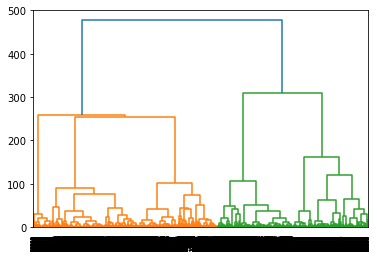

In [57]:
dendro = dendrogram(wardlink)

### Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [37]:
from sklearn.cluster import KMeans

In [38]:
k_means = KMeans(n_clusters = 10)

In [39]:
k_means.fit(df_num_scaled)

KMeans(n_clusters=10)

In [40]:
k_means.inertia_

33619.38028668399

In [41]:
wss= []
for i in range(1,11): 
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_num_scaled)
    wss.append(k_means.inertia_)


In [42]:
wss

[299858.0000000003,
 183349.13035535184,
 130878.35824941272,
 95133.93066619671,
 61539.18919785387,
 51676.892307099595,
 44598.258497467956,
 39597.85505871781,
 36080.753410221645,
 32998.42637865286]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WSS')

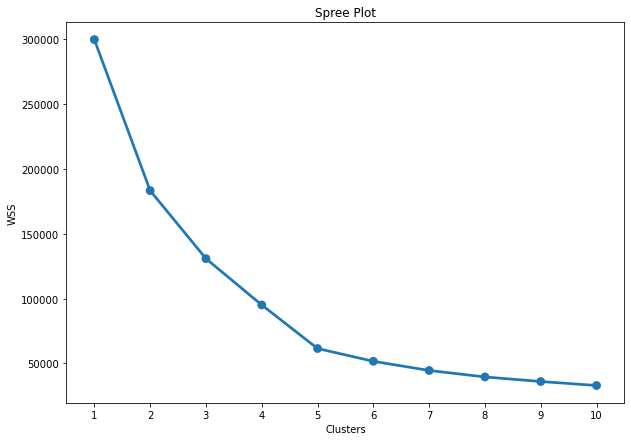

In [43]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,7))
sns.pointplot(a, wss);
plt.title("Spree Plot");
plt.xlabel("Clusters")
plt.ylabel("WSS")


Optimal value of K = 5

# Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
sil_score={1:0}
for i in range(2,11):
    clusterer=KMeans(n_clusters=i,random_state=123)
    y=clusterer.fit_predict(df_num_scaled)
    s=silhouette_score(df_num_scaled, y)
    sil_score[i]=round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.38573
The Average Silhouette Score for 3 clusters is 0.38255
The Average Silhouette Score for 4 clusters is 0.44535
The Average Silhouette Score for 5 clusters is 0.5241
The Average Silhouette Score for 6 clusters is 0.52215
The Average Silhouette Score for 7 clusters is 0.51656
The Average Silhouette Score for 8 clusters is 0.47973
The Average Silhouette Score for 9 clusters is 0.43247
The Average Silhouette Score for 10 clusters is 0.43637


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average Silhouette Score')

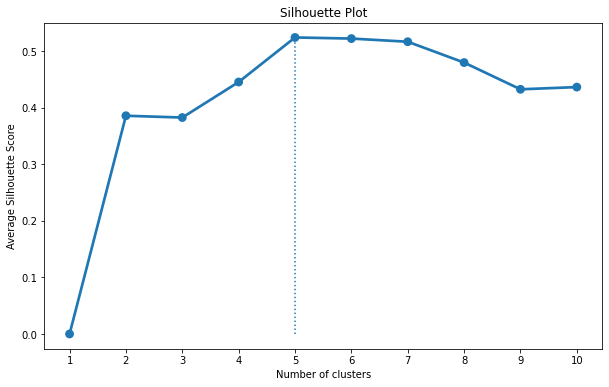

In [46]:
key= [key for key, value in sil_score.items() if value == max(sil_score.values())][0]
fig,ax = plt.subplots(figsize=(10,6))
sns.pointplot(list(sil_score.keys()),list(sil_score.values()))
plt.vlines(x=key-1,ymax=0.5241,ymin=0,linestyles='dotted')
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')


### Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [47]:
K_means = KMeans(n_clusters = 5)
K_means.fit(df_num_scaled)
Labels = K_means.labels_


In [48]:
Labels

array([4, 4, 4, ..., 0, 2, 0])

In [49]:
df["Cluster"]=Labels

In [50]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,4
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,4
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,4
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,4
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,4


In [51]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07,0
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04,0
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05,0
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07,2
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09,0


In [52]:
df["Cluster"].unique()   # Five unique clusters we can observe 

array([4, 0, 2, 3, 1])

In [53]:
df["Cluster"].value_counts()

2    6524
4    6275
0    4676
1    4054
3    1537
Name: Cluster, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [55]:
df.groupby(["Cluster"])["Clicks", "Spend", "Revenue", "CPM", "CTR", "CPC"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_8860\868663194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Cluster"])["Clicks", "Spend", "Revenue", "CPM", "CTR", "CPC"].mean()


,Clicks,Spend,Revenue,CPM,CTR,CPC
Cluster,,,,,,
0,14406.540205,1252.285569,815.541831,12.098200,13.857220,0.090012
1,11245.754810,8646.647997,6373.659814,1.573280,0.217242,0.760929
2,1914.448804,209.162609,135.993379,14.693481,16.037897,0.102794
3,65315.176318,6990.360898,5017.538285,15.385753,13.752664,0.111918
4,3263.131952,1500.090563,977.424163,1.788731,0.404392,0.544614


In [54]:
df.groupby(["Device Type","Cluster"])["Clicks", "Spend", "Revenue", "CPM", "CTR", "CPC"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_6320\2081473614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Device Type","Cluster"])["Clicks", "Spend", "Revenue", "CPM", "CTR", "CPC"].mean()


Clicks        Spend      Revenue        CPM  \
Device Type Cluster                                                      
Desktop     0         3267.725314  1495.319825   974.211859   1.789589   
            1        14541.243713  1251.027671   814.675848  12.069679   
            2        11312.535836  8637.451242  6366.972127   1.561860   
            3         1950.679487   209.291786   136.091814  14.514239   
            4        65285.184919  6972.607522  5002.676306  15.431593   
Mobile      0         3260.603163  1502.717003   979.192636   1.788258   
            1        14331.704923  1252.984401   816.022933  12.114045   
            2        11207.966396  8651.852032  6377.444079   1.579743   
            3         1894.185946   209.090363   135.938327  14.793727   
            4        65332.222449  7000.451337  5025.985350  15.359699   

                           CTR       CPC  
Device Type Cluster                       
Desktop     0         0.408147  0.540612  
            1        13.823352  0.089394  
            2         0.217558  0.754708  
            3        16.053553  0.102897  
            4        13.793226  0.111911  
Mobile      0         0.402325  0.546817  
            1        13.876035  0.090356  
            2         0.217063  0.764450  
            3        16.029142  0.102737  
            4        13.729611  0.111922

<AxesSubplot:xlabel='Cluster', ylabel='CPC'>

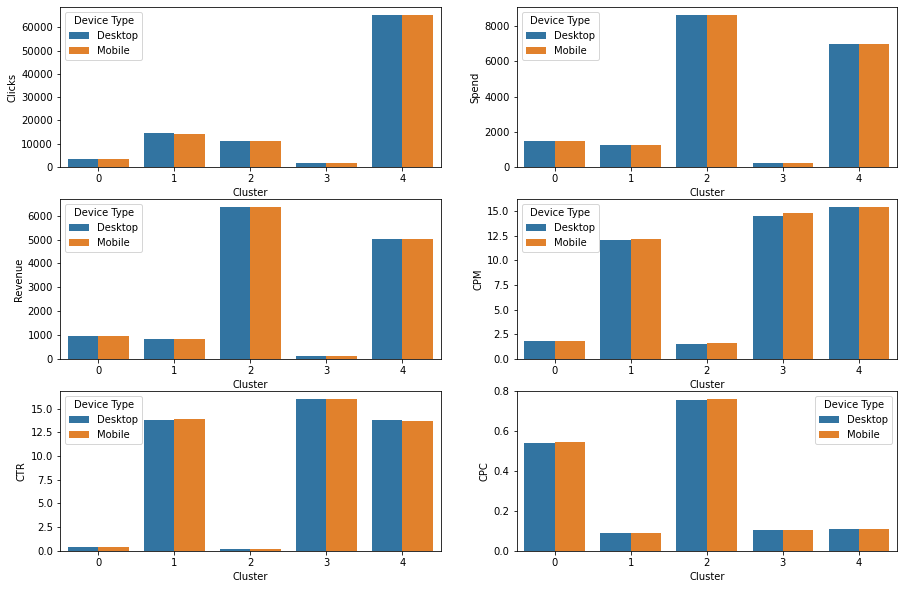

In [55]:
#For clicks

fig, axs= plt.subplots(nrows=3, ncols =2, figsize=(15,10))
sns.barplot(data=df, x="Cluster", y="Clicks", hue="Device Type", ci=None, ax=axs[0][0])
sns.barplot(data=df, x="Cluster", y="Spend", hue="Device Type", ci=None, ax=axs[0][1])
sns.barplot(data=df, x="Cluster", y="Revenue", hue="Device Type", ci=None, ax=axs[1][0])
sns.barplot(data=df, x="Cluster", y="CPM", hue="Device Type", ci=None, ax=axs[1][1])
sns.barplot(data=df, x="Cluster", y="CTR", hue="Device Type", ci=None, ax=axs[2][0])
sns.barplot(data=df, x="Cluster", y="CPC", hue="Device Type", ci=None, ax=axs[2][1])

In [56]:
df.groupby(["Device Type","Cluster"])["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Fee"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_6320\1490254988.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Device Type","Cluster"])["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Fee"].mean()


Ad - Length   Ad- Width        Ad Size  \
Device Type Cluster                                           
Desktop     0         422.168761  152.109515   55098.366248   
            1         685.085030  304.161677  206658.682635   
            2         463.317406  199.228669   74982.225256   
            3         143.953846  571.132479   76678.205128   
            4         143.590664  568.581688   75597.845601   
Mobile      0         421.436126  151.942179   54959.555226   
            1         683.125749  303.576181  205884.231537   
            2         467.176516  199.103901   75286.535342   
            3         142.904398  572.645793   76551.625239   
            4         140.240816  574.642857   75624.489796   

                     Available_Impressions  Matched_Queries       Fee  
Device Type Cluster                                                    
Desktop     0                 1.789820e+06     8.576788e+05  0.349300  
            1                 2.545487e+05     1.382438e+05  0.349545  
            2                 1.046944e+07     5.652794e+06  0.290853  
            3                 3.257803e+04     1.987044e+04  0.349983  
            4                 8.021278e+05     5.653970e+05  0.288474  
Mobile      0                 1.821597e+06     8.678868e+05  0.349244  
            1                 2.495675e+05     1.371660e+05  0.349534  
            2                 1.034225e+07     5.610538e+06  0.290205  
            3                 3.182261e+04     1.948626e+04  0.349990  
            4                 8.087159e+05     5.676979e+05  0.288204

<AxesSubplot:xlabel='Cluster', ylabel='Fee'>

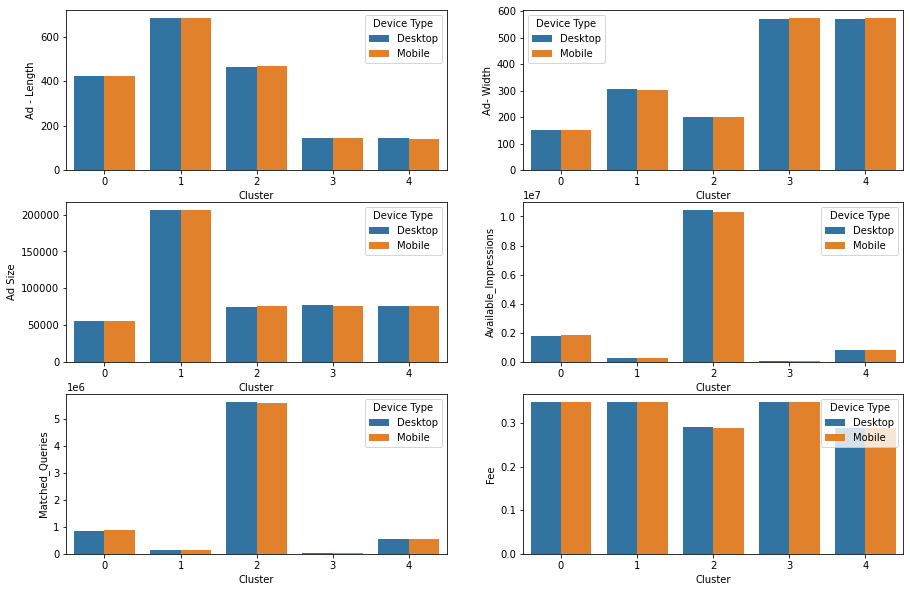

In [57]:
fig, axs= plt.subplots(nrows=3, ncols =2, figsize=(15,10))
sns.barplot(data=df, x="Cluster", y="Ad - Length", hue="Device Type", ci=None, ax=axs[0][0])
sns.barplot(data=df, x="Cluster", y="Ad- Width", hue="Device Type", ci=None, ax=axs[0][1])
sns.barplot(data=df, x="Cluster", y="Ad Size", hue="Device Type", ci=None, ax=axs[1][0])
sns.barplot(data=df, x="Cluster", y="Available_Impressions", hue="Device Type", ci=None, ax=axs[1][1])
sns.barplot(data=df, x="Cluster", y="Matched_Queries", hue="Device Type", ci=None, ax=axs[2][0])
sns.barplot(data=df, x="Cluster", y="Fee", hue="Device Type", ci=None, ax=axs[2][1])

## PCA

PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

### Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.


In [58]:
data = pd.read_excel("PCA India Data_Census (1).xlsx")

In [59]:
data.head().T

,0,1,2,3,4
State Code,1,1,1,1,1
Dist.Code,1,2,3,4,5
State,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir,Jammu & Kashmir
Area Name,Kupwara,Badgam,Leh(Ladakh),Kargil,Punch
No_HH,7707,6218,4452,1320,11654
...,...,...,...,...,...
MARG_HH_0_3_F,252,148,34,50,302
MARG_OT_0_3_M,32,76,0,4,24
MARG_OT_0_3_F,46,178,4,10,105
NON_WORK_M,258,140,67,116,180


In [60]:
data.tail().T

,635,636,637,638,639
State Code,34,34,35,35,35
Dist.Code,636,637,638,639,640
State,Puducherry,Puducherry,Andaman & Nicobar Island,Andaman & Nicobar Island,Andaman & Nicobar Island
Area Name,Mahe,Karaikal,Nicobars,North & Middle Andaman,South Andaman
No_HH,3333,10612,1275,3762,7975
...,...,...,...,...,...
MARG_HH_0_3_F,0,130,6,21,17
MARG_OT_0_3_M,0,4,17,1,2
MARG_OT_0_3_F,0,23,47,4,4
NON_WORK_M,32,110,76,100,148


In [61]:
data.shape

(640, 61)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [63]:
data.isnull().sum().sum()

0

In [64]:
data.duplicated().sum()

0

In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [66]:
data.State.unique()

array(['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'NCT of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman & Diu',
       'Dadara & Nagar Havelli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman & Nicobar Island'], dtype=object)

### Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

Variables selected - No_HH, TOT_M, TOT_F, TOT_WORK_M,TOT_WORK_F


In [67]:
#No of house hold

data["No_HH"].describe()

count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_HH'>

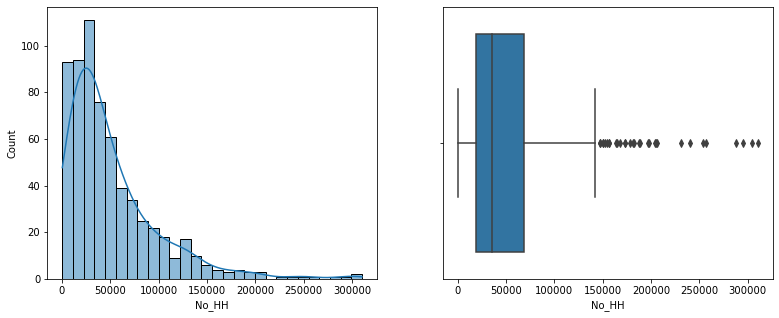

In [68]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))
sns.histplot(data["No_HH"], kde = True, ax=axs[0])
sns.boxplot(data["No_HH"], ax=axs[1])

In [69]:
data["No_HH"].skew()

2.0203872424275566

In [70]:
#Total Male Population
data["TOT_M"].describe()

count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_M'>

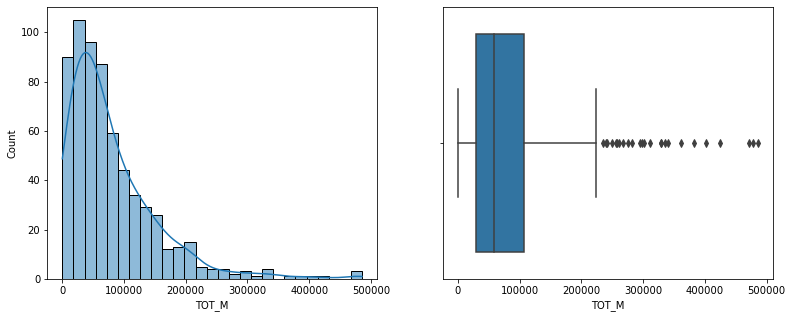

In [71]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))
sns.histplot(data["TOT_M"], kde = True, ax=axs[0])
sns.boxplot(data["TOT_M"], ax=axs[1])

In [72]:
data["TOT_M"].skew()

2.028118092904997

In [73]:
#Total Female population
data["TOT_F"].describe()

count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_F'>

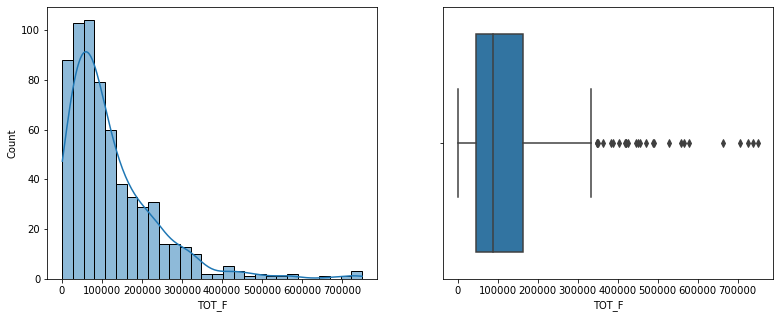

In [74]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))
sns.histplot(data["TOT_F"], kde = True, ax=axs[0])
sns.boxplot(data["TOT_F"], ax=axs[1])

In [75]:
data["TOT_F"].skew()

2.105021322313595

In [76]:
#Total working males

data["TOT_WORK_M"].describe()

count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_WORK_M'>

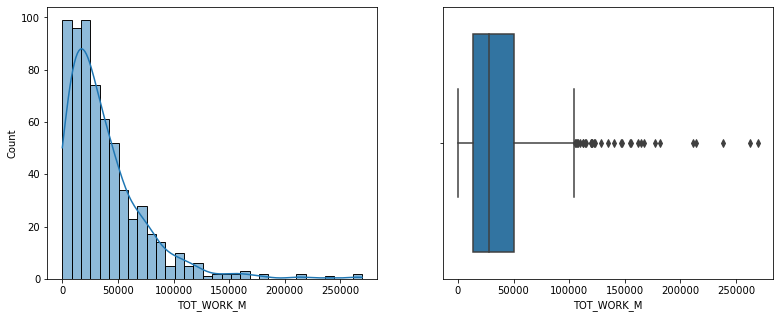

In [77]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))
sns.histplot(data["TOT_WORK_M"], kde = True, ax=axs[0])
sns.boxplot(data["TOT_WORK_M"], ax=axs[1])

In [78]:
data["TOT_WORK_M"].skew()

2.3017009395775583

In [79]:
#Total working Females

data["TOT_WORK_F"].describe()

count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_WORK_F'>

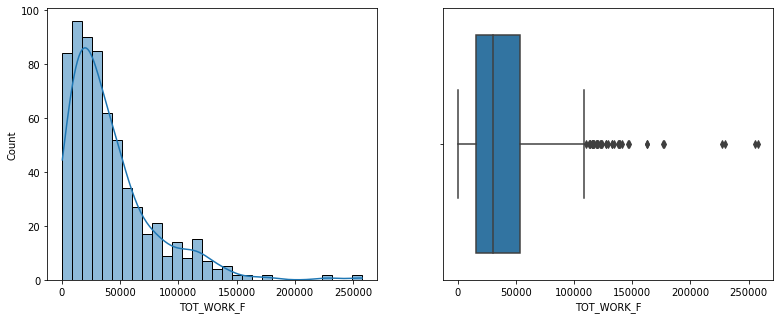

In [80]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))
sns.histplot(data["TOT_WORK_F"], kde = True, ax=axs[0])
sns.boxplot(data["TOT_WORK_F"], ax=axs[1])

In [81]:
data["TOT_WORK_F"].skew()

1.9340007005037583

Bivariate Analysis 

<AxesSubplot:xlabel='State'>

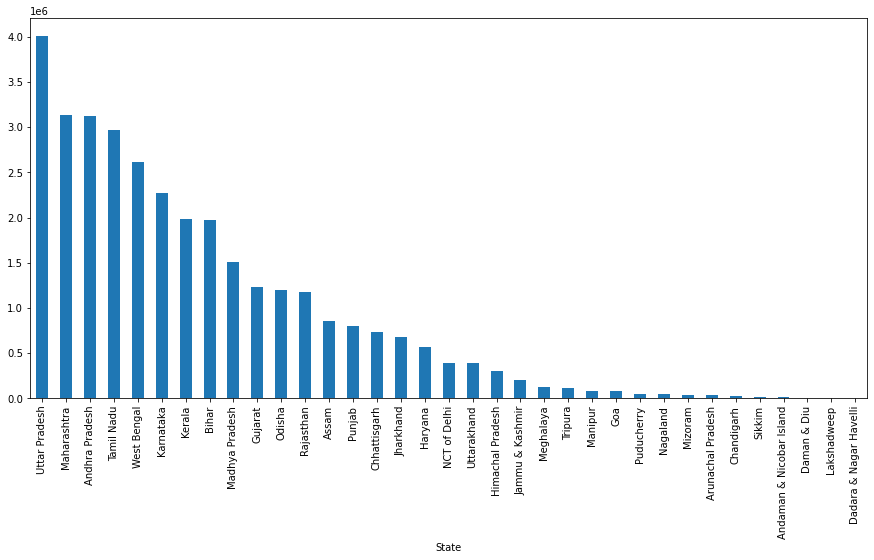

In [82]:
data.groupby("State")["No_HH"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,7))

In [127]:
data.groupby("State")["No_HH"].sum().sort_values(ascending=False)

State
Uttar Pradesh               4006871
Maharashtra                 3136214
Andhra Pradesh              3127287
Tamil Nadu                  2964700
West Bengal                 2615284
Karnataka                   2268615
Kerala                      1982663
Bihar                       1974627
Madhya Pradesh              1503764
Gujarat                     1235200
Odisha                      1202073
Rajasthan                   1177124
Assam                        853374
Punjab                       796030
Chhattisgarh                 734616
Jharkhand                    681905
Haryana                      565971
NCT of Delhi                 394821
Uttarakhand                  392668
Himachal Pradesh             305317
Jammu & Kashmir              203645
Meghalaya                    126845
Tripura                      120647
Manipur                       83320
Goa                           79595
Puducherry                    53950
Nagaland                      53423
Mizoram               

<AxesSubplot:xlabel='State'>

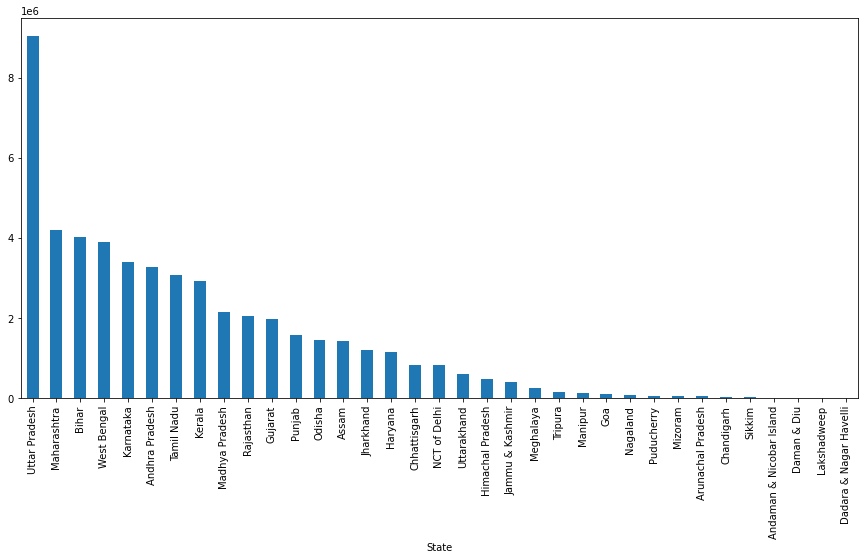

In [83]:
data.groupby("State")["TOT_M"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,7))

In [128]:
data.groupby("State")["TOT_M"].sum().sort_values(ascending=False)

State
Uttar Pradesh               9043969
Maharashtra                 4196130
Bihar                       4025198
West Bengal                 3912553
Karnataka                   3409482
Andhra Pradesh              3274363
Tamil Nadu                  3074009
Kerala                      2919825
Madhya Pradesh              2155608
Rajasthan                   2062563
Gujarat                     1983685
Punjab                      1579405
Odisha                      1460031
Assam                       1437268
Jharkhand                   1202623
Haryana                     1167816
Chhattisgarh                 838404
NCT of Delhi                 833414
Uttarakhand                  613924
Himachal Pradesh             483381
Jammu & Kashmir              421213
Meghalaya                    268036
Tripura                      160457
Manipur                      145524
Goa                          118979
Nagaland                      73506
Puducherry                    70386
Mizoram               

<AxesSubplot:xlabel='State'>

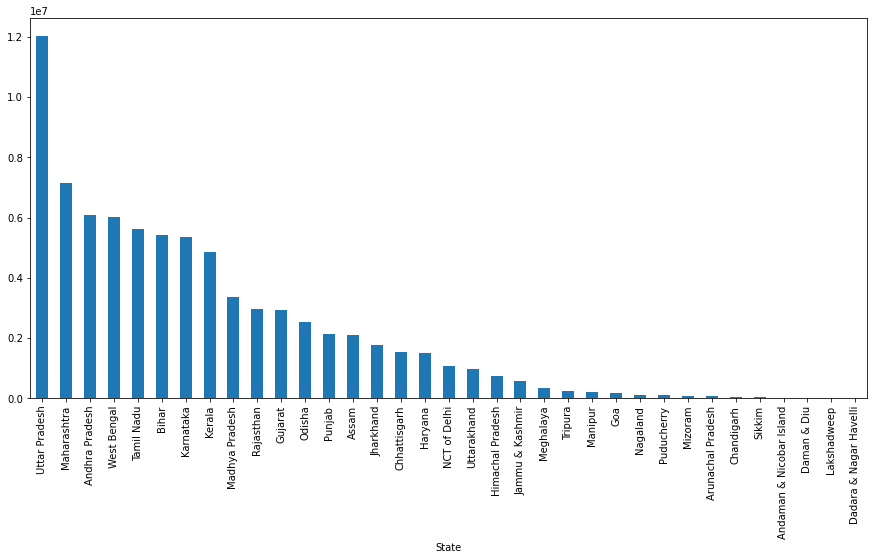

In [84]:
data.groupby("State")["TOT_F"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,7))

In [129]:
data.groupby("State")["TOT_F"].sum().sort_values(ascending=False)

State
Uttar Pradesh               12023885
Maharashtra                  7138557
Andhra Pradesh               6097235
West Bengal                  6016118
Tamil Nadu                   5610310
Bihar                        5405883
Karnataka                    5345675
Kerala                       4856357
Madhya Pradesh               3369745
Rajasthan                    2966496
Gujarat                      2939472
Odisha                       2536980
Punjab                       2121425
Assam                        2093432
Jharkhand                    1763884
Chhattisgarh                 1526592
Haryana                      1498873
NCT of Delhi                 1075266
Uttarakhand                   973147
Himachal Pradesh              752062
Jammu & Kashmir               572959
Meghalaya                     356355
Tripura                       256370
Manipur                       226963
Goa                           191393
Nagaland                      125935
Puducherry                    11

<AxesSubplot:xlabel='State'>

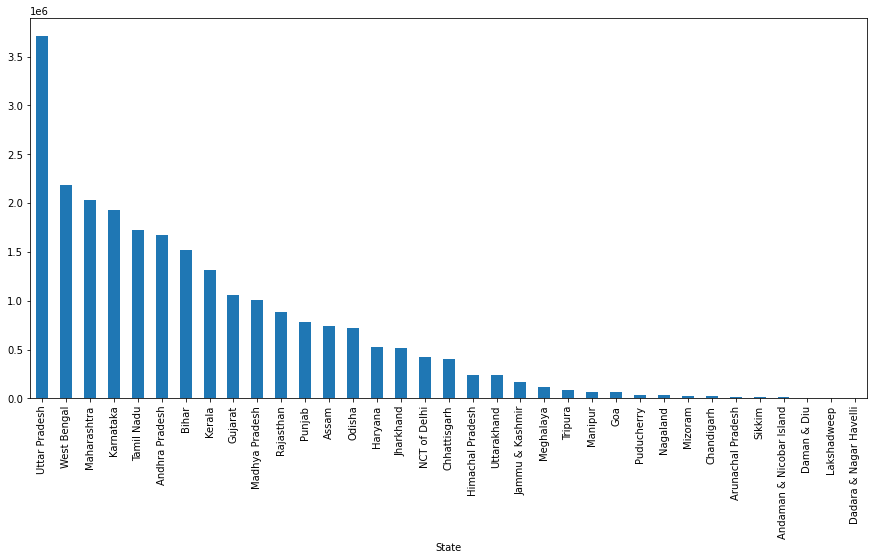

In [85]:
data.groupby("State")["TOT_WORK_M"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,7))

<AxesSubplot:xlabel='State'>

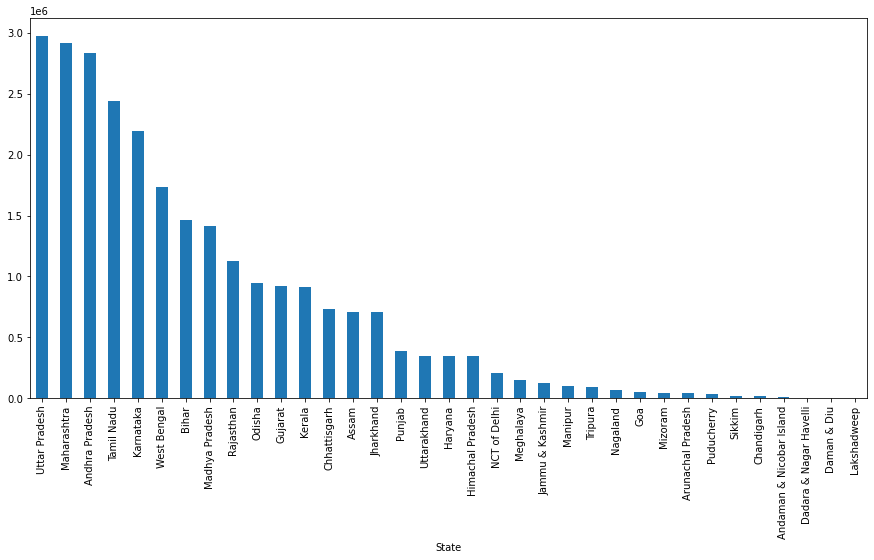

In [86]:
data.groupby("State")["TOT_WORK_F"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,7))

In [87]:
data_ratio=pd.DataFrame(data.groupby('State')["TOT_M"].sum())

In [88]:
data_ratio["TOT_F"]=data.groupby("State")["TOT_F"].sum()

In [133]:
data_ratio["Gender_Ratio"]=round((data_ratio["TOT_M"]/data_ratio["TOT_F"])*1000,0)

In [134]:
data_ratio.sort_values(by="Gender_Ratio",ascending=False)

,TOT_M,TOT_F,Gender_Ratio
State,,,
Lakshadweep,12823,14772,868.0
Haryana,1167816,1498873,779.0
NCT of Delhi,833414,1075266,775.0
Uttar Pradesh,9043969,12023885,752.0
Meghalaya,268036,356355,752.0
Bihar,4025198,5405883,745.0
Punjab,1579405,2121425,745.0
Jammu & Kashmir,421213,572959,735.0
Daman & Diu,13153,18706,703.0


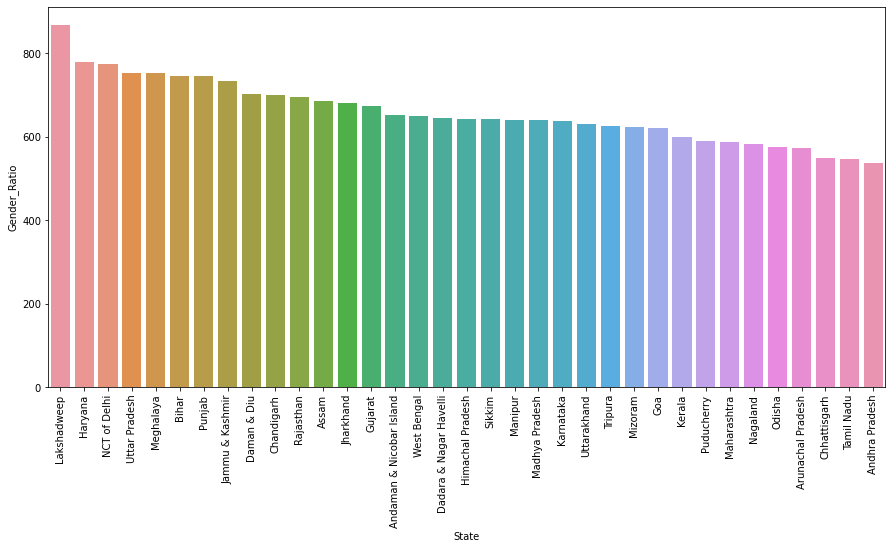

In [135]:
plt.figure(figsize=(15,7))
sns.barplot(x=data_ratio.index, y=data_ratio["Gender_Ratio"], 
            order = data_ratio["Gender_Ratio"].sort_values(ascending=False).index)
plt.xticks(rotation=90);

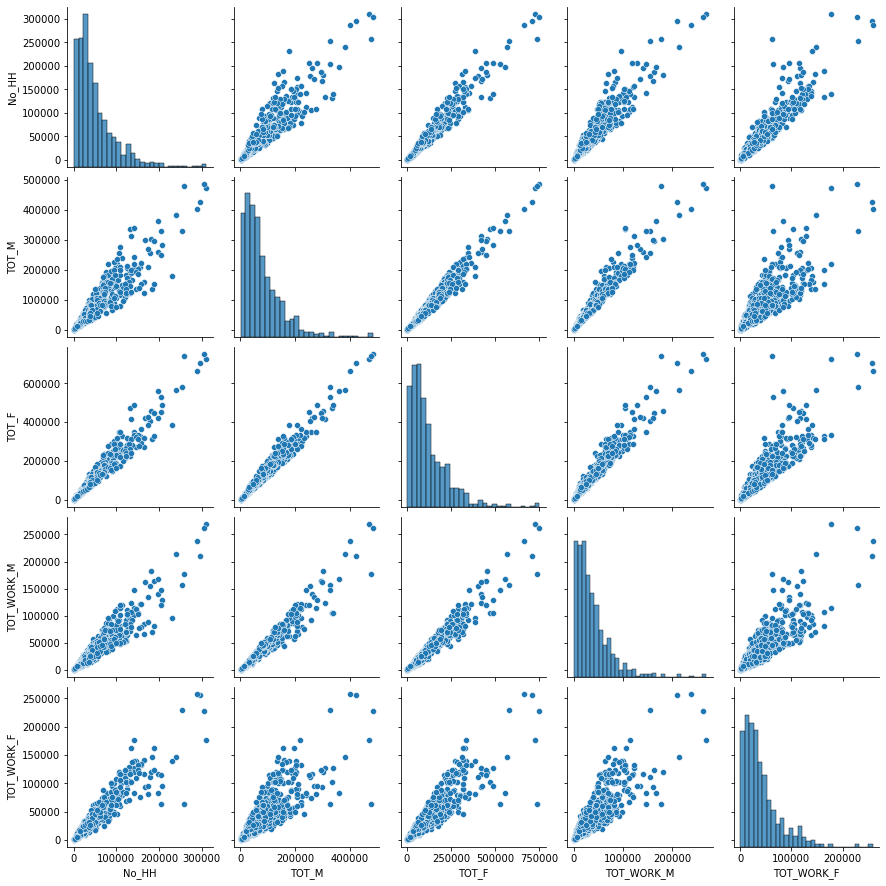

In [138]:
sns.pairplot(data[["No_HH", "TOT_M","TOT_F", "TOT_WORK_M","TOT_WORK_F"]])

In [139]:
data[["No_HH", "TOT_M","TOT_F", "TOT_WORK_M","TOT_WORK_F"]].corr()

,No_HH,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F
No_HH,1.000000,0.916170,0.970590,0.938199,0.925259
TOT_M,0.916170,1.000000,0.982640,0.970417,0.807895
TOT_F,0.970590,0.982640,1.000000,0.968955,0.876233
TOT_WORK_M,0.938199,0.970417,0.968955,1.000000,0.841469
TOT_WORK_F,0.925259,0.807895,0.876233,0.841469,1.000000


### Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.


In [92]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [93]:
data_num=data.iloc[:,4:]

In [94]:
data_num.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [95]:
#Scaling the data using z score 

data_num_scaled = data_num.apply(zscore)

In [96]:
data_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [147]:
data_num_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,7.736867e-17,1.000782,-1.057697,-0.659882,-0.319887,0.367358,5.389586
TOT_M,640.0,-1.864828e-16,1.000782,-1.084858,-0.677956,-0.294592,0.381549,5.529690
TOT_F,640.0,-2.983724e-17,1.000782,-1.071906,-0.668250,-0.305233,0.368945,5.532633
M_06,640.0,-2.654127e-17,1.000782,-1.066236,-0.659189,-0.274114,0.366445,7.301993
F_06,640.0,2.081668e-18,1.000782,-1.050264,-0.642376,-0.289756,0.349898,7.350309
M_SC,640.0,-1.769418e-17,1.000782,-0.958783,-0.718323,-0.293404,0.389092,6.207800
F_SC,640.0,1.283695e-17,1.000782,-0.957049,-0.698964,-0.325615,0.386976,6.248040
M_ST,640.0,-8.291978e-17,1.000782,-0.625124,-0.595467,-0.389534,0.148027,9.146281
F_ST,640.0,-1.125836e-16,1.000782,-0.640197,-0.613122,-0.398476,0.146540,7.562324
M_LIT,640.0,5.030698e-18,1.000782,-1.032495,-0.656385,-0.273410,0.358381,6.180672


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


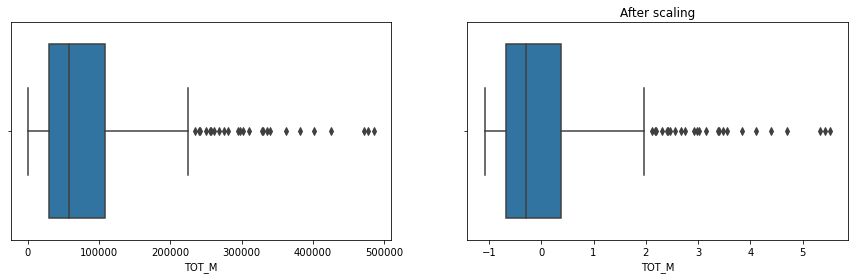

In [161]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
sns.boxplot(data_num["TOT_M"], ax=axs[0])
sns.boxplot(data_num_scaled["TOT_M"], ax=axs[1])
plt.title("After scaling");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


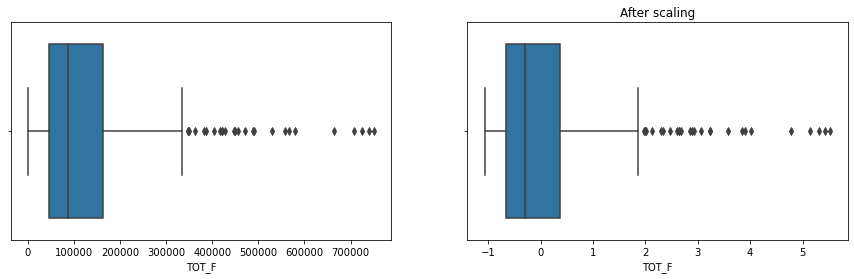

In [162]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
sns.boxplot(data_num["TOT_F"], ax=axs[0])
sns.boxplot(data_num_scaled["TOT_F"], ax=axs[1])
plt.title("After scaling");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


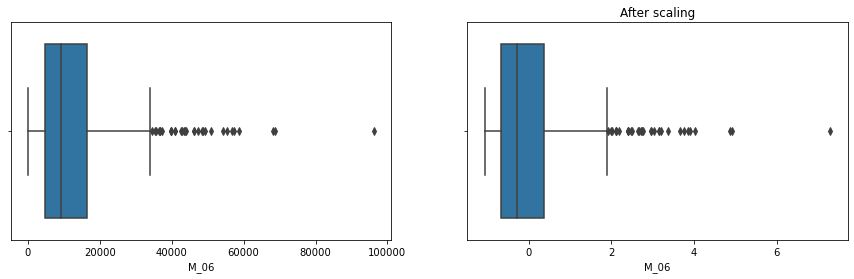

In [163]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
sns.boxplot(data_num["M_06"], ax=axs[0])
sns.boxplot(data_num_scaled["M_06"], ax=axs[1])
plt.title("After scaling");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_HH'>

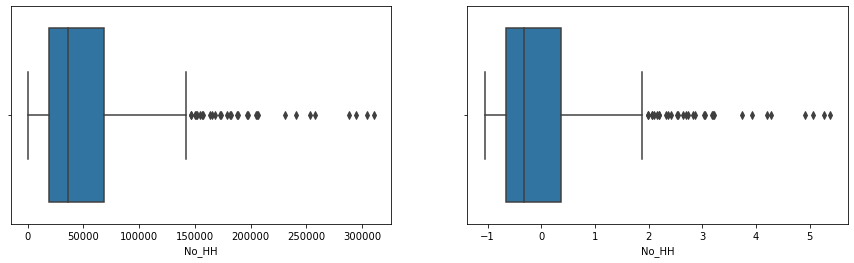

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
sns.boxplot(data_num["No_HH"], ax=axs[0])
sns.boxplot(data_num_scaled["No_HH"], ax=axs[1])

### Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


In [101]:
#Bartletts Test of Sphericity

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_num_scaled)
p_value


C:\Users\User\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [102]:
#KMO Test

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_num_scaled)
kmo_model


C:\Users\User\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.803988993278217

In [103]:
round(data_num_scaled.cov(),2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,...,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,...,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,...,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,...,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,...,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,...,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,...,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,...,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,...,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,...,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


In [164]:
from sklearn.decomposition import PCA

pca = PCA(n_components=57, random_state=123)
data_pca = pca.fit_transform(data_num_scaled)



In [105]:
#Eigen Vectors
eigen_vectors=pca.components_

In [106]:
eigen_vectors.T

array([[ 0.15602058, -0.12634653, -0.00269025, ...,  0.        ,
         0.        , -0.        ],
       [ 0.16711763, -0.08967655,  0.05669762, ...,  0.2077636 ,
         0.2887035 ,  0.18790022],
       [ 0.16555318, -0.10491237,  0.03874947, ...,  0.24647657,
        -0.20596721,  0.02642675],
       ...,
       [ 0.13219224,  0.05081332, -0.07871987, ..., -0.07217993,
         0.04019745, -0.02597314],
       [ 0.15037558, -0.06536455,  0.11182732, ...,  0.00399206,
        -0.03192722, -0.13972835],
       [ 0.1310662 , -0.07384742,  0.1025525 , ..., -0.06929081,
         0.00778048, -0.02147533]])

In [177]:
#Eigen Values
eigen_values=pca.explained_variance_
print("Eigen Values are \n {}".format(eigen_values))

Eigen Values are 
 [3.18135647e+01 7.86942415e+00 4.15340812e+00 3.66879058e+00
 2.20652588e+00 1.93827502e+00 1.17617374e+00 7.51159086e-01
 6.17053743e-01 5.28300887e-01 4.29831189e-01 3.53440201e-01
 2.96163013e-01 2.81275560e-01 1.92158325e-01 1.36267920e-01
 1.13389199e-01 1.06303946e-01 9.72885376e-02 8.01062194e-02
 5.76089954e-02 4.43955966e-02 3.78910846e-02 2.96360194e-02
 2.70797618e-02 2.34458139e-02 1.45111511e-02 1.09852268e-02
 9.31507853e-03 8.13540203e-03 7.89250253e-03 5.02601514e-03
 2.59771182e-03 1.06789820e-03 7.13559124e-04 2.47799812e-31
 2.47799812e-31 2.47799812e-31 2.47799812e-31 2.47799812e-31
 2.47799812e-31 2.47799812e-31 2.47799812e-31 2.47799812e-31
 2.47799812e-31 2.47799812e-31 2.47799812e-31 2.47799812e-31
 2.47799812e-31 2.47799812e-31 2.47799812e-31 2.47799812e-31
 2.47799812e-31 2.47799812e-31 2.47799812e-31 2.47799812e-31
 2.47799812e-31]


In [178]:
var_exp_ratio = pca.explained_variance_ratio_

In [167]:
var_exp_ratio

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [183]:
print("Cummulative Sum of Explained Variance Ratio \n \n{} ".format(np.cumsum(var_exp_ratio)))

Cummulative Sum of Explained Variance Ratio 
 
[0.55726063 0.69510499 0.76785794 0.83212212 0.87077261 0.9047243
 0.92532669 0.93848433 0.94929292 0.95854687 0.96607599 0.97226701
 0.97745473 0.98238168 0.98574761 0.98813454 0.99012071 0.99198278
 0.99368693 0.99509011 0.99609921 0.99687687 0.99754058 0.9980597
 0.99853404 0.99894473 0.99919891 0.99939134 0.9995545  0.99969701
 0.99983525 0.99992329 0.9999688  0.9999875  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ] 


In [111]:
PC_list = []
for i in range(1,58):
    PC_list.append("PC {}".format(i))

In [112]:
all_pcs=pd.DataFrame(eigen_vectors.T, columns=PC_list, index=data_num_scaled.columns)

In [113]:
all_pcs

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 48,PC 49,PC 50,PC 51,PC 52,PC 53,PC 54,PC 55,PC 56,PC 57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,1.617181e-01,-3.303320e-01,-2.059894e-01,3.603136e-01,5.705250e-02,-5.500596e-02,2.085654e-01,2.077636e-01,2.887035e-01,1.879002e-01
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,1.907122e-01,-8.601042e-02,-1.608897e-01,-1.625048e-01,1.682776e-01,-2.897220e-01,-1.875516e-01,2.464766e-01,-2.059672e-01,2.642675e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,-2.870332e-15,-3.410187e-16,-5.577075e-16,4.228508e-15,-1.807309e-15,-1.402359e-15,2.162048e-15,-1.035093e-15,9.011819e-16,1.054760e-15
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,2.475438e-15,2.685312e-16,-4.896323e-16,-2.956643e-15,2.466542e-15,4.935750e-16,-2.078115e-15,6.018242e-16,-1.034874e-15,-1.244560e-15
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,2.230854e-15,1.734723e-16,-1.203898e-15,-6.591949e-16,7.806256e-16,4.987330e-17,9.992007e-16,-2.567391e-16,1.193490e-15,2.046974e-16
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,-2.319125e-15,-3.999868e-16,1.219330e-15,5.288230e-16,-5.610032e-16,5.905796e-17,-1.283792e-15,1.483734e-16,-1.459949e-15,-3.444703e-16
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,-6.375109e-16,2.532696e-16,9.957313e-16,-4.753142e-16,9.220055e-16,2.090342e-16,-2.792905e-16,6.626644e-16,-3.590878e-16,2.099015e-16
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,7.199102e-16,-7.459311e-17,-8.812395e-16,2.853620e-16,-9.861903e-16,-2.619432e-16,2.099015e-16,-5.793976e-16,3.105155e-16,-2.324529e-16
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,7.940474e-02,2.718792e-01,3.688725e-01,-2.905299e-01,-1.007714e-01,1.545324e-01,1.180816e-01,2.098104e-01,2.719897e-01,-4.080427e-03


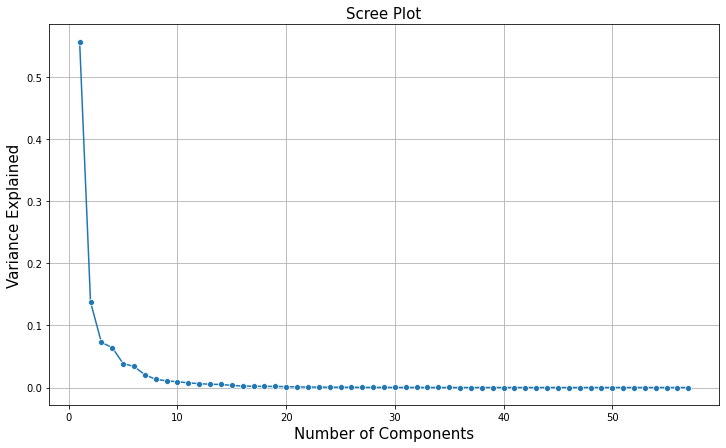

In [114]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()


In [115]:
#From Scree plot and explained variance ratios, we can say that there are 6 pcs, which contain 90% of the explained variance
#hence number we will go ahead with first 6 prinipal components

In [198]:
pca = PCA(n_components=6, random_state=123)
final_data = pca.fit_transform(data_num_scaled)

In [199]:
df_final_data = pd.DataFrame(final_data, columns=extracted_pcs.columns)

In [202]:
round(df_final_data.corr(),2)   #Correlation between the PCs can be seen zero except the digonals

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
PC 1,1.0,0.0,-0.0,-0.0,0.0,-0.0
PC 2,0.0,1.0,0.0,-0.0,0.0,-0.0
PC 3,-0.0,0.0,1.0,-0.0,0.0,0.0
PC 4,-0.0,-0.0,-0.0,1.0,-0.0,0.0
PC 5,0.0,0.0,0.0,-0.0,1.0,-0.0
PC 6,-0.0,-0.0,0.0,0.0,-0.0,1.0


In [203]:
extracted_pcs=all_pcs.iloc[:,:6]  #Extracting the requried loading of the 6 PCS

In [204]:
extracted_pcs

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


Text(0.5, 0, 'PC 1')

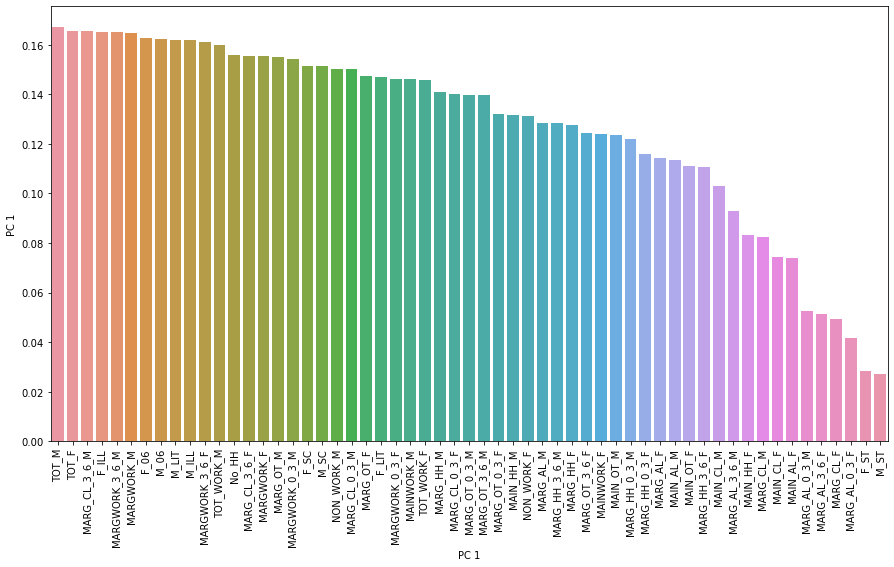

In [193]:
plt.figure(figsize=(15,8))
sns.barplot(data=extracted_pcs, x=extracted_pcs.index, y="PC 1", 
            order=abs(extracted_pcs["PC 1"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);
plt.xlabel("PC 1")

Text(0.5, 0, 'PC 2')

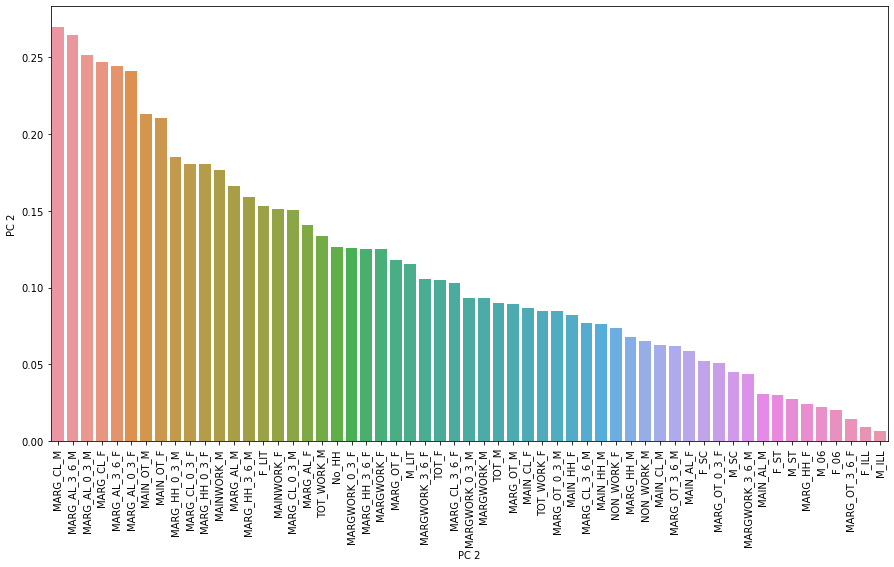

In [194]:
plt.figure(figsize=(15,8))
sns.barplot(x=extracted_pcs.index, y=abs(extracted_pcs["PC 2"]),
           order=abs(extracted_pcs["PC 2"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);
plt.xlabel("PC 2")

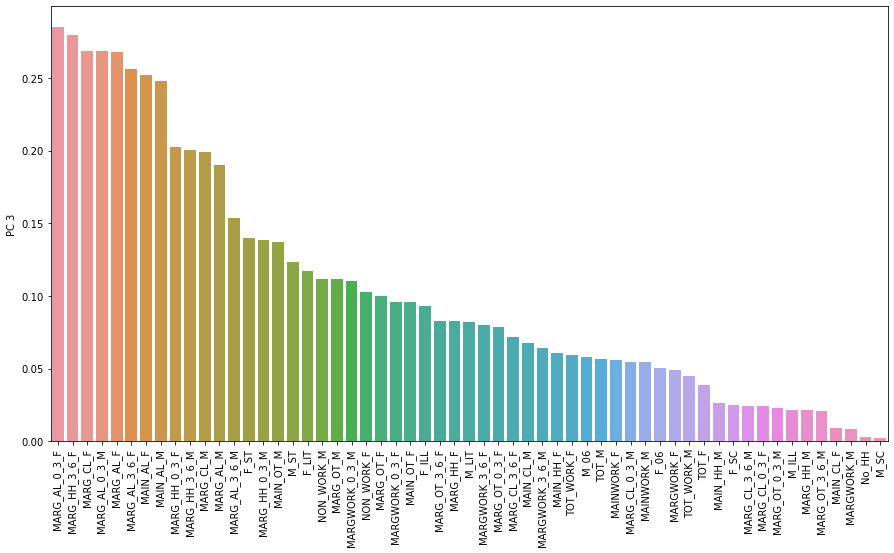

In [195]:
plt.figure(figsize=(15,8))
sns.barplot(x=extracted_pcs.index, y=abs(extracted_pcs["PC 3"]),
           order=abs(extracted_pcs["PC 3"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);


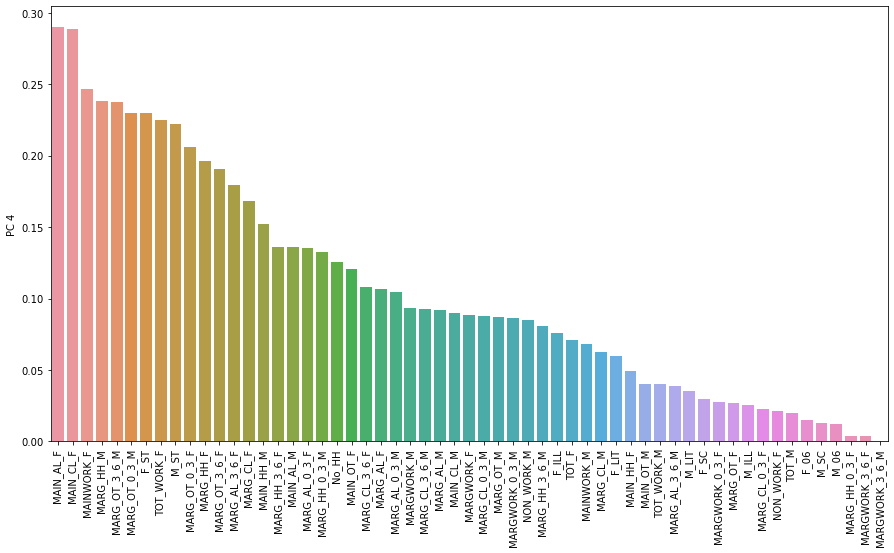

In [187]:
plt.figure(figsize=(15,8))
sns.barplot(x=extracted_pcs.index, y=abs(extracted_pcs["PC 4"]),
           order=abs(extracted_pcs["PC 4"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);

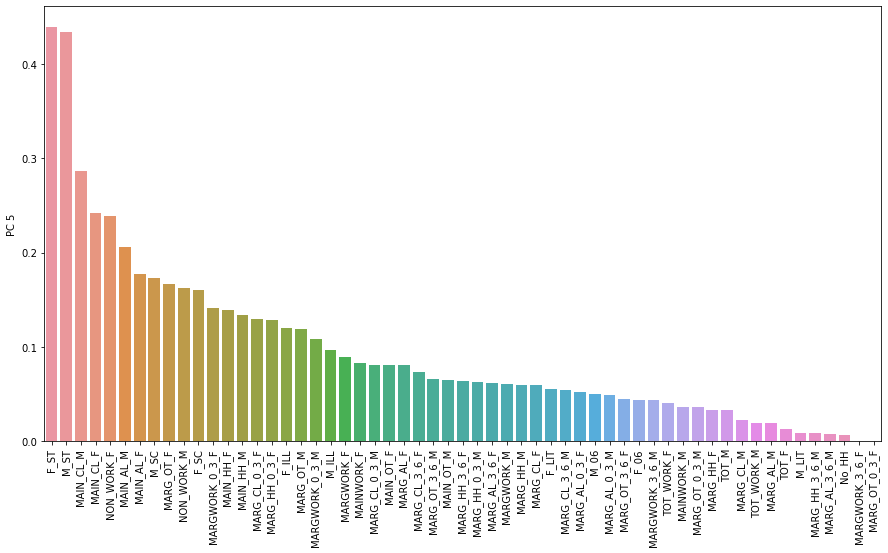

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(x=extracted_pcs.index, y=abs(extracted_pcs["PC 5"]),
           order=abs(extracted_pcs["PC 5"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);

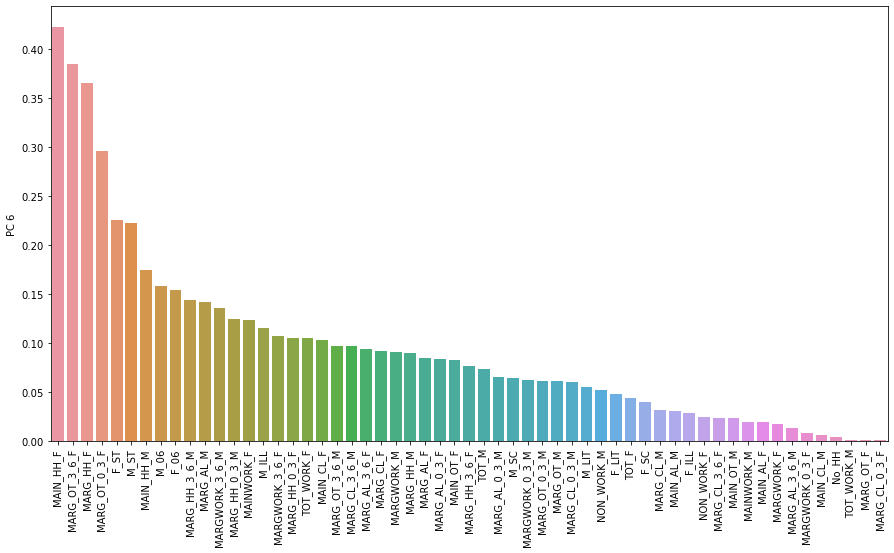

In [190]:
plt.figure(figsize=(15,8))
sns.barplot(x=extracted_pcs.index, y=abs(extracted_pcs["PC 6"]),
           order=abs(extracted_pcs["PC 6"]).sort_values(ascending=False).index)
plt.xticks(rotation=90);

<AxesSubplot:>

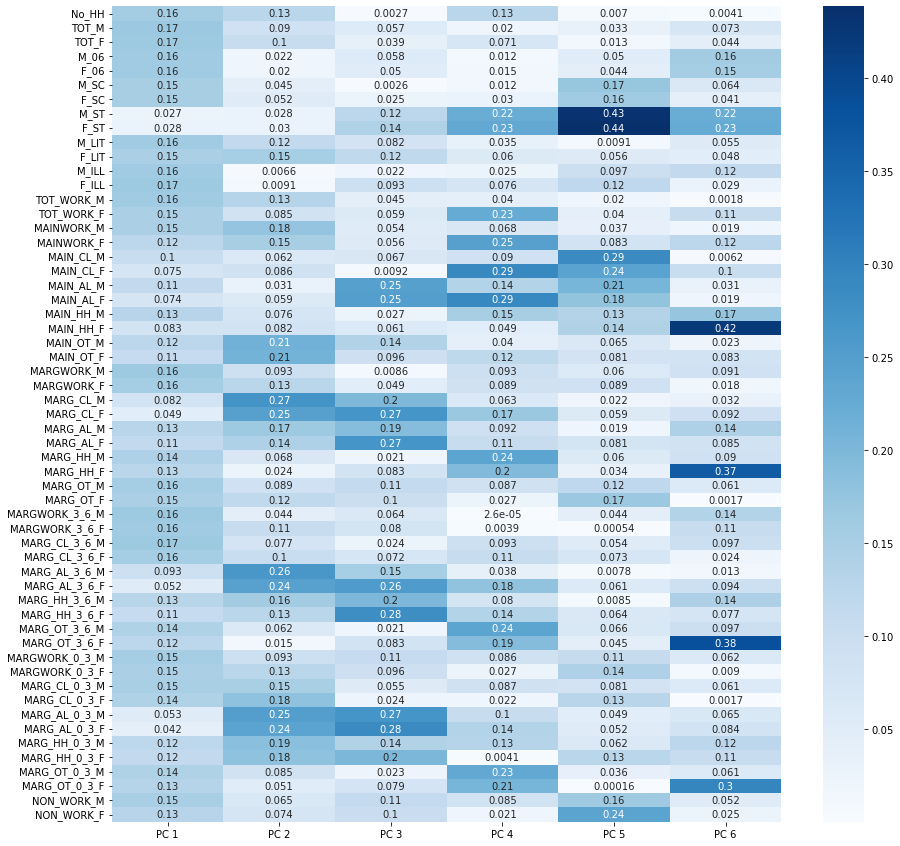

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(data=abs(extracted_pcs), annot=True, cmap="Blues")

In [206]:
extracted_pcs.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436


In [215]:
for i in range(len(extracted_pcs["PC 1"])):
    for j in range(len(extracted_pcs.index)):
        if i ==j:
            print(extracted_pcs.iloc[i,0].round(3), "x", extracted_pcs.index[j])

0.156 x No_HH
0.167 x TOT_M
0.166 x TOT_F
0.162 x M_06
0.163 x F_06
0.151 x M_SC
0.152 x F_SC
0.027 x M_ST
0.028 x F_ST
0.162 x M_LIT
0.147 x F_LIT
0.162 x M_ILL
0.165 x F_ILL
0.16 x TOT_WORK_M
0.146 x TOT_WORK_F
0.146 x MAINWORK_M
0.124 x MAINWORK_F
0.103 x MAIN_CL_M
0.075 x MAIN_CL_F
0.113 x MAIN_AL_M
0.074 x MAIN_AL_F
0.132 x MAIN_HH_M
0.083 x MAIN_HH_F
0.124 x MAIN_OT_M
0.111 x MAIN_OT_F
0.165 x MARGWORK_M
0.155 x MARGWORK_F
0.082 x MARG_CL_M
0.049 x MARG_CL_F
0.129 x MARG_AL_M
0.114 x MARG_AL_F
0.141 x MARG_HH_M
0.128 x MARG_HH_F
0.155 x MARG_OT_M
0.147 x MARG_OT_F
0.165 x MARGWORK_3_6_M
0.161 x MARGWORK_3_6_F
0.166 x MARG_CL_3_6_M
0.156 x MARG_CL_3_6_F
0.093 x MARG_AL_3_6_M
0.052 x MARG_AL_3_6_F
0.129 x MARG_HH_3_6_M
0.111 x MARG_HH_3_6_F
0.14 x MARG_OT_3_6_M
0.125 x MARG_OT_3_6_F
0.154 x MARGWORK_0_3_M
0.146 x MARGWORK_0_3_F
0.15 x MARG_CL_0_3_M
0.14 x MARG_CL_0_3_F
0.053 x MARG_AL_0_3_M
0.042 x MARG_AL_0_3_F
0.122 x MARG_HH_0_3_M
0.116 x MARG_HH_0_3_F
0.14 x MARG_OT_0_3_M
0.132